In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

In [2]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2023,1,1)

In [3]:
#Bank of America
BAC = data.get_data_tiingo('BAC',start,end,api_key="133d0f4da6157bc71ccec3396138172f235fbad4")
#CitiGroup
C = data.get_data_tiingo('C',start,end,api_key="133d0f4da6157bc71ccec3396138172f235fbad4")
#Goldman Sachs
GS = data.get_data_tiingo('GS',start,end,api_key="133d0f4da6157bc71ccec3396138172f235fbad4")
#Morgan Stanley
MS = data.get_data_tiingo('MS',start,end,api_key="133d0f4da6157bc71ccec3396138172f235fbad4")
#Wells Fargo
WFC = data.get_data_tiingo('WFC',start,end,api_key="133d0f4da6157bc71ccec3396138172f235fbad4")

C:\Users\USER\AppData\Local\Temp\ipykernel_26020\1032685785.py:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  BAC = data.get_data_tiingo('BAC',start,end,api_key="133d0f4da6157bc71ccec3396138172f235fbad4")
C:\Users\USER\AppData\Local\Temp\ipykernel_26020\1032685785.py:4: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  C = data.get_data_tiingo('C',start,end,api_key="133d0f4da6157bc71ccec3396138172f235fbad4")
C:\Users\USER\AppData\Local\Temp\ipykernel_26020\1032685785.py:6: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  GS = data.get_data_tiingo('GS',start,end,api_key="133d0f4da6157bc71ccec3396138172f235fbad4")
C:\Users\USER\AppData\Local\Temp\ipykernel_26020\1032685785.py:8: FutureWarning: In a future version of pandas all arguments of concat except for the a

In [4]:
#JPMorgan Bank
JPM = data.get_data_tiingo('JPM',start,end,api_key="133d0f4da6157bc71ccec3396138172f235fbad4")

C:\Users\USER\AppData\Local\Temp\ipykernel_26020\205257136.py:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  JPM = data.get_data_tiingo('JPM',start,end,api_key="133d0f4da6157bc71ccec3396138172f235fbad4")


In [5]:
tickers = ['BAC','C','GS','JPM','MS','WFC']

In [6]:
new_tickers = {
    'BAC': BAC,
    'C': C,
    'GS': GS,
    'JPM': JPM,
    'MS': MS,
    'WFC': WFC
}

In [7]:
cols = BAC.columns # all dataframes have same columns
cols

Index(['close', 'high', 'low', 'open', 'volume', 'adjClose', 'adjHigh',
       'adjLow', 'adjOpen', 'adjVolume', 'divCash', 'splitFactor'],
      dtype='object')

In [8]:
import random
from functools import reduce
from itertools import product

# merge into one dataframe (use random numbers to avoid duplicate columns)
new_bank_stocks = reduce(lambda l, r: pd.merge(l,r,on='date',suffixes=('', str(random.random()))), new_tickers.values())
# rename columns with hierarchy
new_bank_stocks.columns = pd.MultiIndex.from_product([new_tickers.keys(), cols])
# new_bank_stocks.sample(10)
new_bank_stocks.head().sample(10, axis=1)

new_bank_stocks.columns.names = ['Bank Ticker',"Stock Info"]

In [9]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis=1, keys=tickers)

In [10]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [11]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(bank_stocks.head())

Bank Ticker                         BAC                                   \
Stock Info                        close   high    low   open      volume   
symbol date                                                                
BAC    2006-01-03 00:00:00+00:00  47.08  47.18  46.15  46.92  16296700.0   
       2006-01-04 00:00:00+00:00  46.58  47.24  46.45  47.00  17757900.0   
       2006-01-05 00:00:00+00:00  46.64  46.83  46.32  46.58  14970700.0   
       2006-01-06 00:00:00+00:00  46.57  46.91  46.35  46.80  12599800.0   
       2006-01-09 00:00:00+00:00  46.60  46.97  46.36  46.72  15619400.0   

Bank Ticker                                                                   \
Stock Info                         adjClose    adjHigh     adjLow    adjOpen   
symbol date                                                                    
BAC    2006-01-03 00:00:00+00:00  31.112650  31.178735  30.498063  31.006914   
       2006-01-04 00:00:00+00:00  30.782227  31.218385  30.696317  31.0

In [12]:
new_bank_stocks.head(5)

Bank Ticker                  BAC                                            \
Stock Info                 close   high    low   open    volume   adjClose   
date                                                                         
2006-01-03 00:00:00+00:00  47.08  47.18  46.15  46.92  16296700  31.112650   
2006-01-04 00:00:00+00:00  46.58  47.24  46.45  47.00  17757900  30.782227   
2006-01-05 00:00:00+00:00  46.64  46.83  46.32  46.58  14970700  30.821877   
2006-01-06 00:00:00+00:00  46.57  46.91  46.35  46.80  12599800  30.775618   
2006-01-09 00:00:00+00:00  46.60  46.97  46.36  46.72  15619400  30.795444   

Bank Ticker                                                           ...  \
Stock Info                   adjHigh     adjLow    adjOpen adjVolume  ...   
date                                                                  ...   
2006-01-03 00:00:00+00:00  31.178735  30.498063  31.006914  16296700  ...   
2006-01-04 00:00:00+00:00  31.218385  30.696317  31.059782  17757900  ...   
2006-01-05 00:00:00+00:00  30.947438  30.610407  30.782227  14970700  ...   
2006-01-06 00:00:00+00:00  31.000306  30.630232  30.927613  12599800  ...   
2006-01-09 00:00:00+00:00  31.039957  30.636840  30.874745  15619400  ...   

Bank Ticker                  WFC                                        \
Stock Info                   low   open   volume   adjClose    adjHigh   
date                                                                     
2006-01-03 00:00:00+00:00  62.39  63.20  5508200  19.640481  19.686658   
2006-01-04 00:00:00+00:00  62.73  63.60  5435000  19.412676  19.591226   
2006-01-05 00:00:00+00:00  62.62  63.00  5079000  19.391127  19.428069   
2006-01-06 00:00:00+00:00  62.77  63.16  4201900  19.505030  19.563520   
2006-01-09 00:00:00+00:00  63.11  63.35  2809800  19.501951  19.594305   

Bank Ticker                                                                    
Stock Info                    adjLow    adjOpen adjVolume divCash splitFactor  
date                                                                           
2006-01-03 00:00:00+00:00  19.206421  19.455775  11016400     0.0         1.0  
2006-01-04 00:00:00+00:00  19.311088  19.578913  10870000     0.0         1.0  
2006-01-05 00:00:00+00:00  19.277225  19.394206  10158000     0.0         1.0  
2006-01-06 00:00:00+00:00  19.323402  19.443461   8403800     0.0         1.0  
2006-01-09 00:00:00+00:00  19.428069  19.501951   5619600     0.0         1.0  

[5 rows x 72 columns]

In [13]:
for tick in tickers:
    print('{}: ${}'.format(tick,bank_stocks[tick]['close'].max()))

BAC: $54.9
C: $81.91
GS: $423.85
JPM: $171.78
MS: $108.73
WFC: $73.0


In [14]:
bank_stocks.xs(key='close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.90
C       81.91
GS     423.85
JPM    171.78
MS     108.73
WFC     73.00
dtype: float64

In [15]:
returns = pd.DataFrame()

In [16]:
for tick in tickers:
    returns[tick+' Return'] = new_bank_stocks[tick]['close'].pct_change()

In [17]:
returns.head()

BAC Return  C Return  GS Return  JPM Return  \
date                                                                     
2006-01-03 00:00:00+00:00         NaN       NaN        NaN         NaN   
2006-01-04 00:00:00+00:00   -0.010620 -0.018462  -0.013812   -0.014183   
2006-01-05 00:00:00+00:00    0.001288  0.004961  -0.000393    0.003029   
2006-01-06 00:00:00+00:00   -0.001501  0.000000   0.014169    0.007046   
2006-01-09 00:00:00+00:00    0.000644 -0.004731   0.012030    0.016242   

                           MS Return  WFC Return  
date                                              
2006-01-03 00:00:00+00:00        NaN         NaN  
2006-01-04 00:00:00+00:00   0.000686   -0.011599  
2006-01-05 00:00:00+00:00   0.002742   -0.001110  
2006-01-06 00:00:00+00:00   0.001025    0.005874  
2006-01-09 00:00:00+00:00   0.010586   -0.000158

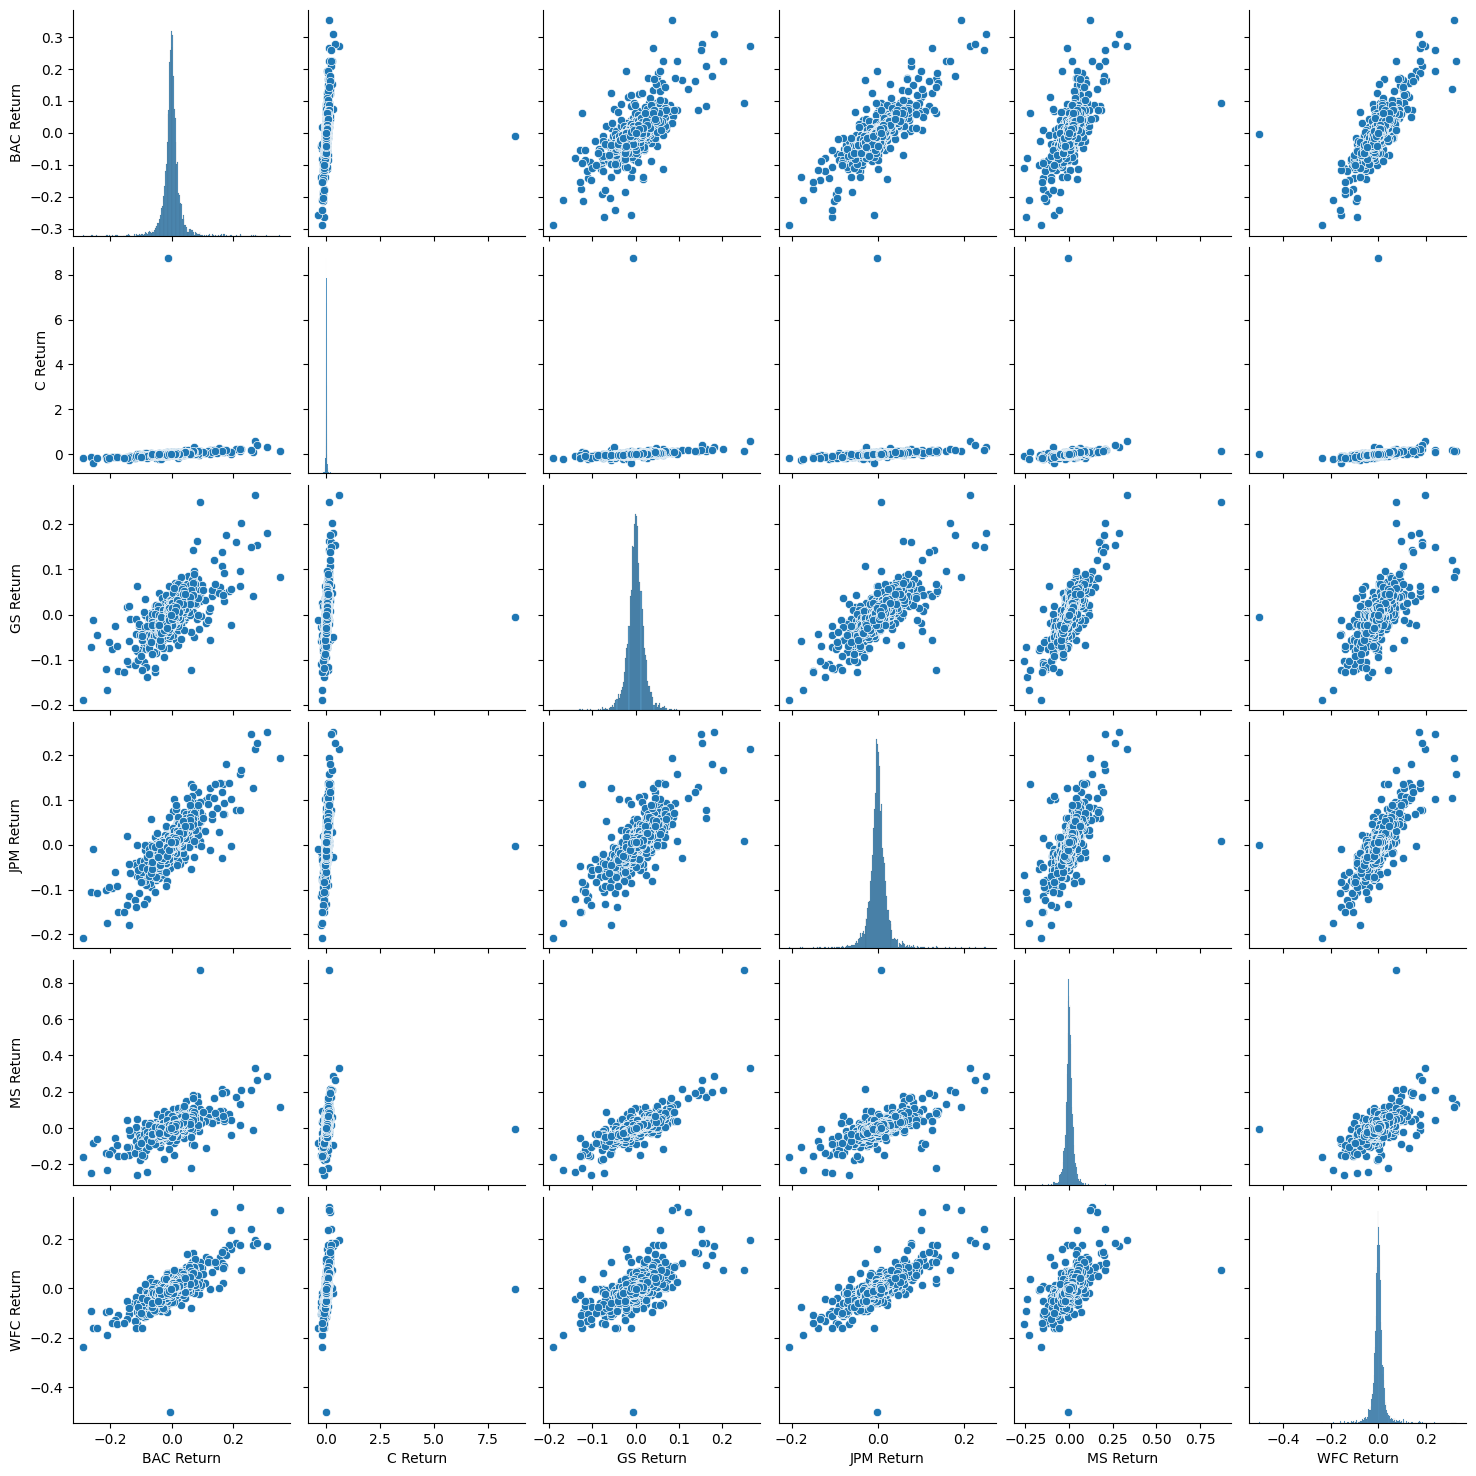

In [18]:
import seaborn as sns
#Index 0 is null
sns.pairplot(returns[1:])

In [19]:
returns.min()

BAC Return   -0.289694
C Return     -0.390244
GS Return    -0.189596
JPM Return   -0.207274
MS Return    -0.258929
WFC Return   -0.502084
dtype: float64

In [20]:
returns['BAC Return'].min()

-0.2896935933147633

In [21]:
returns.max()

BAC Return    0.352691
C Return      8.769912
GS Return     0.264678
JPM Return    0.250967
MS Return     0.869835
WFC Return    0.327645
dtype: float64

In [22]:
returns.idxmin()

BAC Return   2009-01-20 00:00:00+00:00
C Return     2009-02-27 00:00:00+00:00
GS Return    2009-01-20 00:00:00+00:00
JPM Return   2009-01-20 00:00:00+00:00
MS Return    2008-10-09 00:00:00+00:00
WFC Return   2006-08-14 00:00:00+00:00
dtype: datetime64[ns, UTC]

In [23]:
returns.idxmax()

BAC Return   2009-04-09 00:00:00+00:00
C Return     2011-05-09 00:00:00+00:00
GS Return    2008-11-24 00:00:00+00:00
JPM Return   2009-01-21 00:00:00+00:00
MS Return    2008-10-13 00:00:00+00:00
WFC Return   2008-07-16 00:00:00+00:00
dtype: datetime64[ns, UTC]

In [24]:
returns.std()

BAC Return    0.031158
C Return      0.138072
GS Return     0.023058
JPM Return    0.024298
MS Return     0.031986
WFC Return    0.027932
dtype: float64

In [25]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

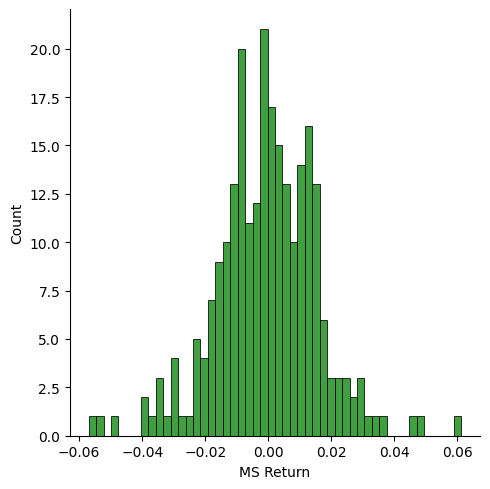

In [26]:
sns.displot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=50)

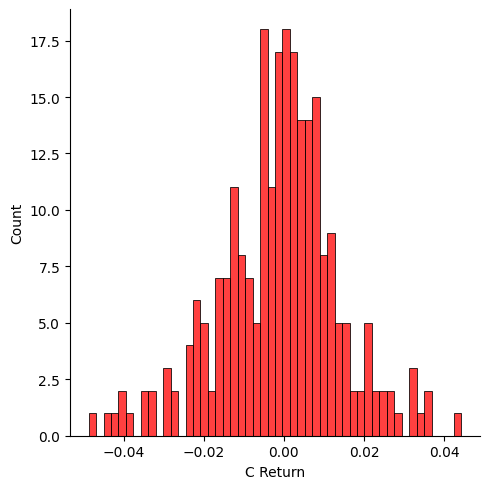

In [27]:
sns.displot(returns.loc['2018-01-01' : '2018-12-31']['C Return'],color='red',bins=50)

In [28]:
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

import plotly
import cufflinks as cf
cf.go_offline()

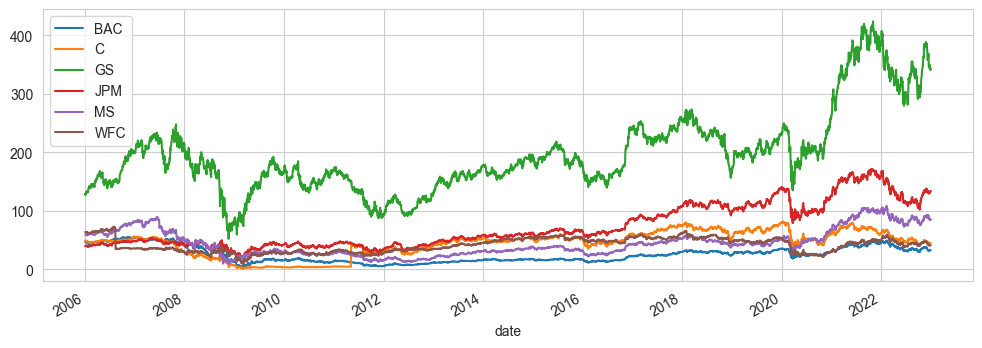

In [29]:
#Need to assign the data to the label for legend
for tick in tickers:
  new_bank_stocks[tick]['close'].plot(label=tick,figsize=(12,4))

plt.legend()

In [30]:
new_bank_stocks.xs(key='close',axis = 1,level = 'Stock Info')

Bank Ticker                  BAC      C      GS     JPM     MS    WFC
date                                                                 
2006-01-03 00:00:00+00:00  47.08  49.29  128.87   40.19  58.31  63.80
2006-01-04 00:00:00+00:00  46.58  48.38  127.09   39.62  58.35  63.06
2006-01-05 00:00:00+00:00  46.64  48.62  127.04   39.74  58.51  62.99
2006-01-06 00:00:00+00:00  46.57  48.62  128.84   40.02  58.57  63.36
2006-01-09 00:00:00+00:00  46.60  48.39  130.39   40.67  59.19  63.35
...                          ...    ...     ...     ...    ...    ...
2022-12-23 00:00:00+00:00  32.47  44.26  345.51  131.28  86.11  40.98
2022-12-27 00:00:00+00:00  32.53  44.39  341.97  131.74  85.06  41.04
2022-12-28 00:00:00+00:00  32.77  44.62  340.87  132.46  84.46  41.12
2022-12-29 00:00:00+00:00  33.14  45.16  343.43  133.22  85.24  41.33
2022-12-30 00:00:00+00:00  33.12  45.23  343.38  134.10  85.02  41.29

[4279 rows x 6 columns]

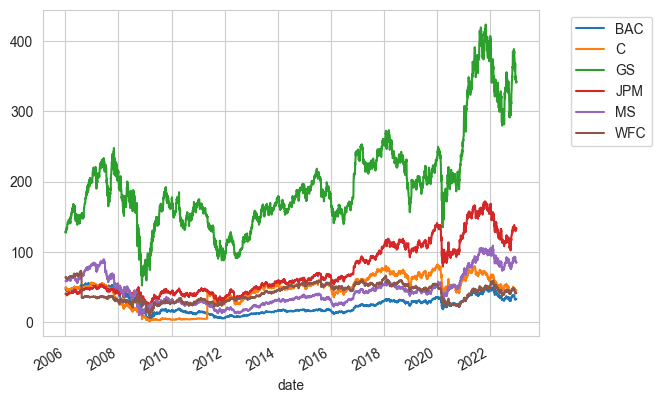

In [96]:
new_bank_stocks.xs(key='close',axis = 1,level = 'Stock Info').plot()
plt.legend(bbox_to_anchor=(1.05,1))

In [97]:
new_bank_stocks.xs(key='close',axis = 1,level = 'Stock Info').iplot()

# **Moving Average**

<AxesSubplot: xlabel='date'>

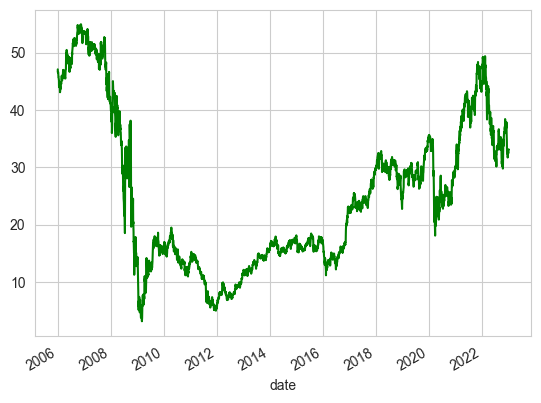

In [33]:
new_bank_stocks['BAC']['close'].plot(color='green')

In [34]:
new_bank_stocks.loc['2008-01-03':'2009-01-03']['MS']['close']

date
2008-01-03 00:00:00+00:00    50.94
2008-01-04 00:00:00+00:00    49.30
2008-01-07 00:00:00+00:00    48.31
2008-01-08 00:00:00+00:00    46.40
2008-01-09 00:00:00+00:00    47.73
                             ...  
2008-12-26 00:00:00+00:00    14.65
2008-12-29 00:00:00+00:00    14.90
2008-12-30 00:00:00+00:00    15.19
2008-12-31 00:00:00+00:00    16.04
2009-01-02 00:00:00+00:00    16.99
Name: close, Length: 253, dtype: float64

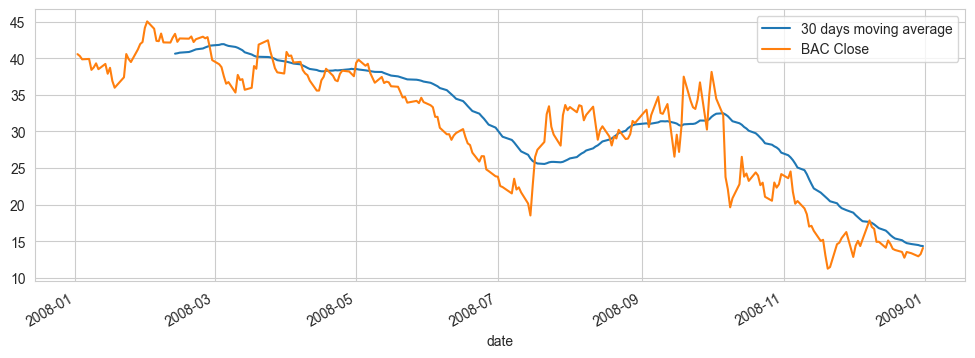

In [35]:
plt.figure(figsize=(12,4))
new_bank_stocks.loc['2008-01-01':'2009-01-01']['BAC']['close'].rolling(window=30).mean().plot(label='30 days moving average')
new_bank_stocks.loc['2008-01-01':'2009-01-01']['BAC']['close'].plot(label='BAC Close')
plt.legend()
plt.show()

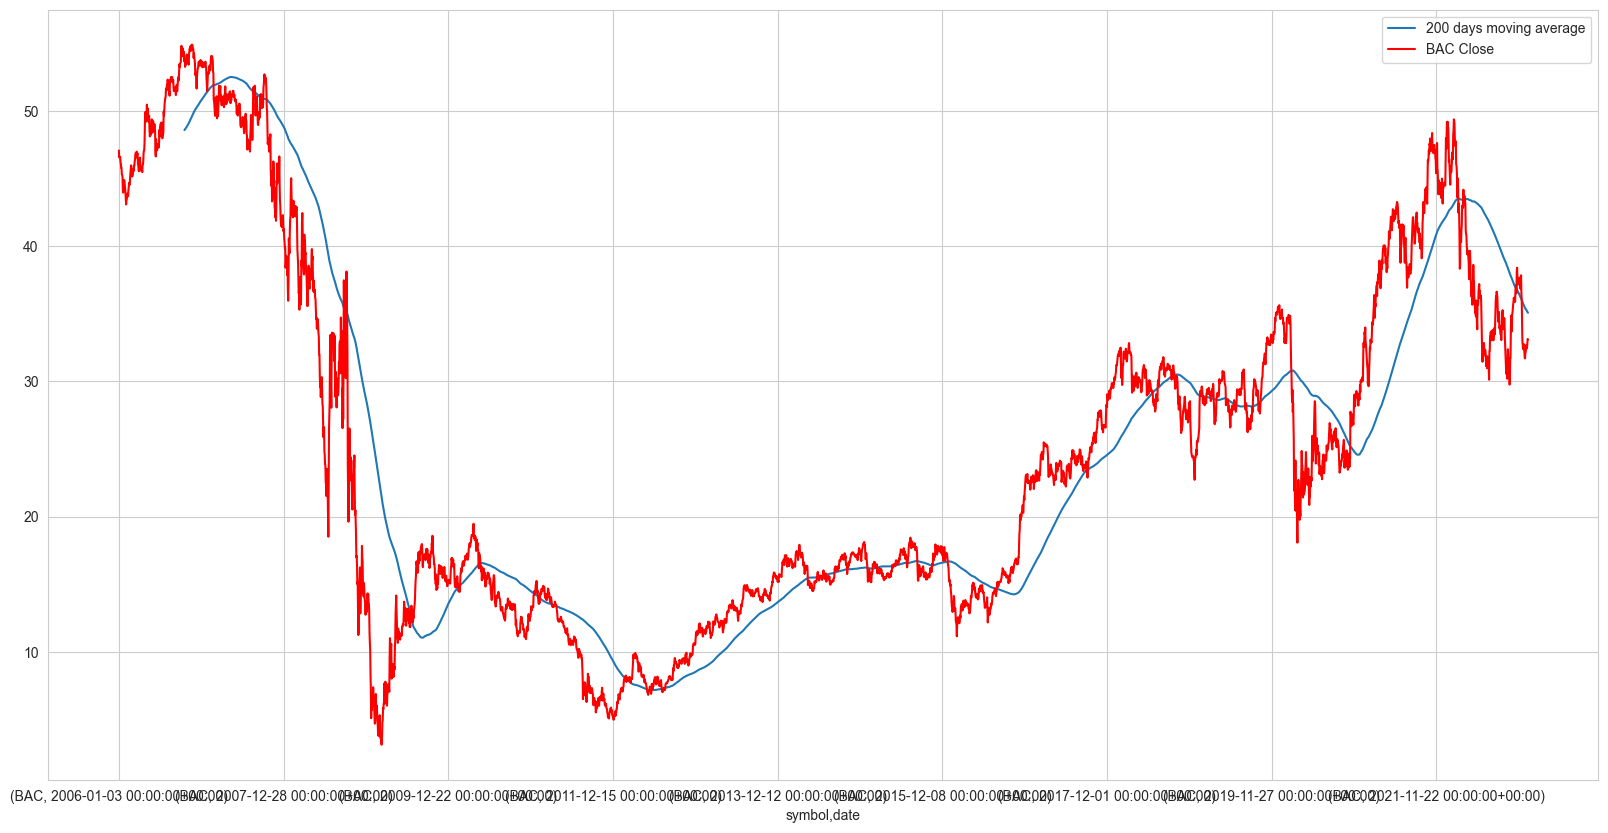

In [78]:
plt.figure(figsize=(20,10))
BAC['close'].rolling(window=200).mean().plot(label='200 days moving average')
BAC['close'].plot(label='BAC Close',color='red')
plt.legend()

In [37]:
new_bank_stocks.xs(key='close',axis=1,level='Stock Info')

Bank Ticker                  BAC      C      GS     JPM     MS    WFC
date                                                                 
2006-01-03 00:00:00+00:00  47.08  49.29  128.87   40.19  58.31  63.80
2006-01-04 00:00:00+00:00  46.58  48.38  127.09   39.62  58.35  63.06
2006-01-05 00:00:00+00:00  46.64  48.62  127.04   39.74  58.51  62.99
2006-01-06 00:00:00+00:00  46.57  48.62  128.84   40.02  58.57  63.36
2006-01-09 00:00:00+00:00  46.60  48.39  130.39   40.67  59.19  63.35
...                          ...    ...     ...     ...    ...    ...
2022-12-23 00:00:00+00:00  32.47  44.26  345.51  131.28  86.11  40.98
2022-12-27 00:00:00+00:00  32.53  44.39  341.97  131.74  85.06  41.04
2022-12-28 00:00:00+00:00  32.77  44.62  340.87  132.46  84.46  41.12
2022-12-29 00:00:00+00:00  33.14  45.16  343.43  133.22  85.24  41.33
2022-12-30 00:00:00+00:00  33.12  45.23  343.38  134.10  85.02  41.29

[4279 rows x 6 columns]

In [38]:
new_bank_stocks.xs(key='close',axis=1,level='Stock Info').corr()

Bank Ticker       BAC         C        GS       JPM        MS       WFC
Bank Ticker                                                            
BAC          1.000000  0.455961  0.588560  0.422950  0.869445  0.303298
C            0.455961  1.000000  0.597093  0.731402  0.536035  0.716706
GS           0.588560  0.597093  1.000000  0.874155  0.863055  0.378976
JPM          0.422950  0.731402  0.874155  1.000000  0.681465  0.427230
MS           0.869445  0.536035  0.863055  0.681465  1.000000  0.315121
WFC          0.303298  0.716706  0.378976  0.427230  0.315121  1.000000

<AxesSubplot: xlabel='Bank Ticker', ylabel='Bank Ticker'>

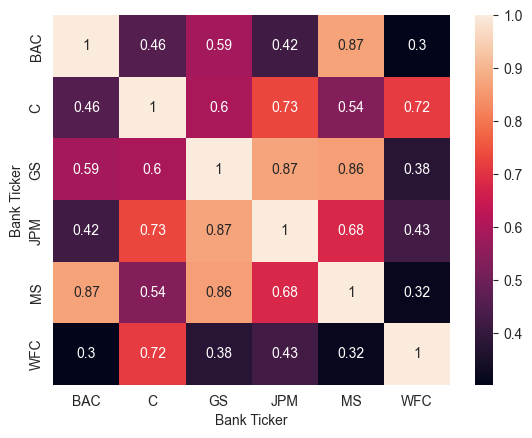

In [92]:
sns.heatmap(new_bank_stocks.xs(key='close',axis=1,level='Stock Info').corr(),annot=True)

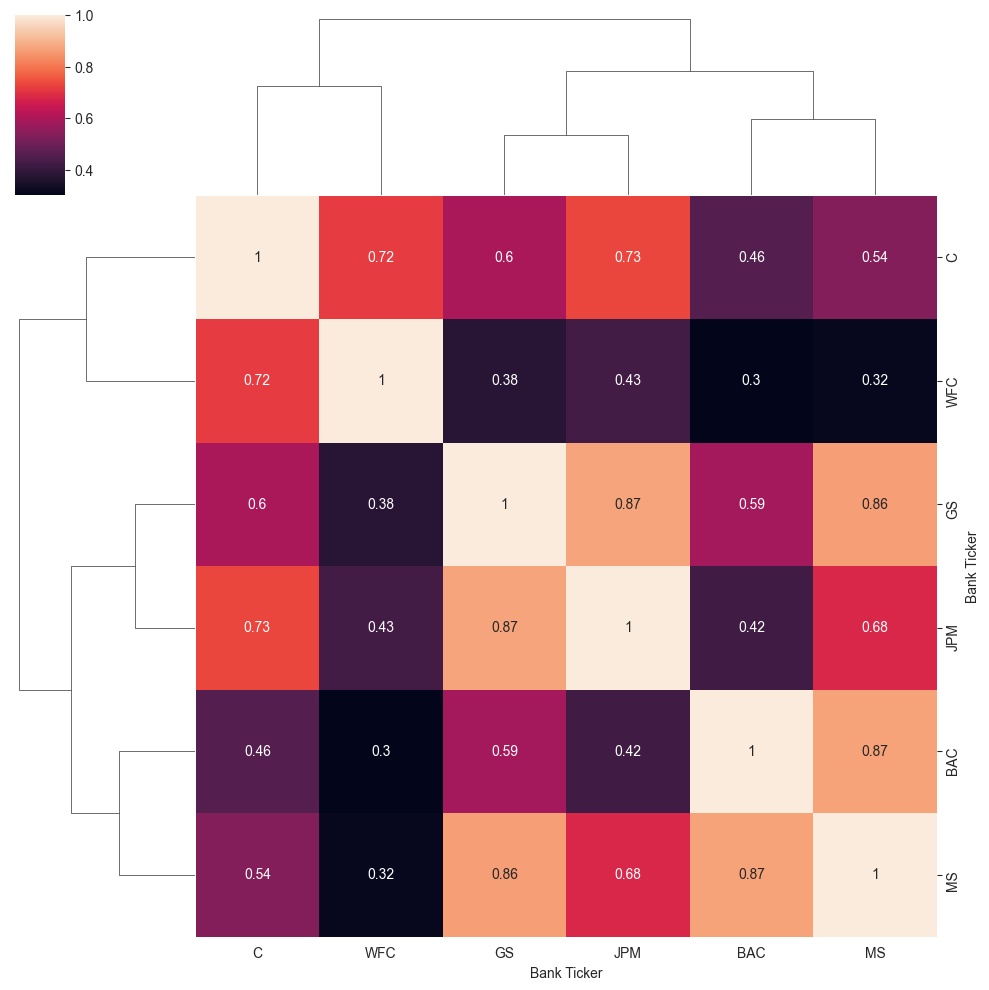

In [40]:
sns.clustermap(new_bank_stocks.xs(key='close',axis=1,level='Stock Info').corr(),annot=True)

In [51]:
close_corr = new_bank_stocks.xs(key='close',axis=1,level='Stock Info').corr()

In [91]:
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

In [64]:
new_bank_stocks['BAC'][['open','high','low','close']].loc['2015-01-01' : '2016-01-01'].iplot(kind='candle')

In [81]:
new_bank_stocks['MS']['close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[20,50,200])

In [90]:
new_bank_stocks['BAC']['close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')

In [88]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Select the 'BAC' stock's data for the specified date range
bac_data = new_bank_stocks['BAC'].loc['2015-01-01':'2016-01-01']

# Create a subplot with two rows, one for the candlestick chart and one for Bollinger Bands
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.05)

# Plot the candlestick chart for the 'BAC' stock
fig.add_trace(go.Candlestick(x=bac_data.index,
                             open=bac_data['open'],
                             high=bac_data['high'],
                             low=bac_data['low'],
                             close=bac_data['close'],
                             name='Candlestick'), row=1, col=1)

# Calculate Bollinger Bands (20-day moving average and 2 standard deviations)
bac_data['MA'] = bac_data['close'].rolling(window=20).mean()
bac_data['Upper'] = bac_data['MA'] + 2 * bac_data['close'].rolling(window=20).std()
bac_data['Lower'] = bac_data['MA'] - 2 * bac_data['close'].rolling(window=20).std()

# Plot Bollinger Bands
fig.add_trace(go.Scatter(x=bac_data.index, y=bac_data['Upper'], line=dict(color='blue'), name='Upper Band'), row=1, col=1)
fig.add_trace(go.Scatter(x=bac_data.index, y=bac_data['Lower'], line=dict(color='blue'), name='Lower Band'), row=1, col=1)
fig.add_trace(go.Scatter(x=bac_data.index, y=bac_data['MA'], line=dict(color='green'), name='MA'), row=1, col=1)

# Update the layout for subplot 1 (candlestick chart)
fig.update_xaxes(title_text='Date', row=1, col=1)
fig.update_yaxes(title_text='Price', row=1, col=1)

# Update the layout for subplot 2 (Bollinger Bands)
fig.update_xaxes(title_text='Date', row=2, col=1)
fig.update_yaxes(title_text='Price', row=2, col=1)

# Set the title and adjust the height of the figure
fig.update_layout(title='BAC Stock - Candlestick Chart and Bollinger Bands',
                  height=800)

# Show the combined plot
fig.show()


In [89]:
# Select the 'BAC' stock's data for the specified date range
bac_data = new_bank_stocks['BAC'].loc['2015-01-01':'2016-01-01']

# Create a subplot with two rows, one for the candlestick chart and one for Moving Average
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.05)

# Plot the candlestick chart for the 'BAC' stock
fig.add_trace(go.Candlestick(x=bac_data.index,
                             open=bac_data['open'],
                             high=bac_data['high'],
                             low=bac_data['low'],
                             close=bac_data['close'],
                             name='Candlestick'), row=1, col=1)

bac_data['MA'] = bac_data['close'].rolling(window=50).mean()

# Plot Moving Average
fig.add_trace(go.Scatter(x=bac_data.index, y=bac_data['MA'], line=dict(color='green'), name='MA'), row=1, col=1)

# Update the layout for subplot 1 (candlestick chart)
fig.update_xaxes(title_text='Date', row=1, col=1)
fig.update_yaxes(title_text='Price', row=1, col=1)

# Update the layout for subplot 2 (Bollinger Bands)
fig.update_xaxes(title_text='Date', row=2, col=1)
fig.update_yaxes(title_text='Price', row=2, col=1)

# Set the title and adjust the height of the figure
fig.update_layout(title='BAC Stock - Candlestick Chart and Moving Average',
                  height=800)

# Show the combined plot
fig.show()
